# Image Classification Project using CNN

In this project convolutional neural network (CNN) is built to perform classification of images in [Cifar 10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset which consists of ten types of images - airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck.

TensorFlow package was used for creating the model.

Project was run on Google Colab using their NVIDIA-SMI GPU.

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi

Thu Nov 28 20:32:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Reading data
cifar10 = tf.keras.datasets.cifar10

# Splitting into train and validation
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(48000, 32, 32, 3) (48000, 1) (12000, 32, 32, 3) (12000, 1)


In [4]:
input_shape = (32, 32, 3)

# Transforming pixel values to be in interval [0, 1]
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [5]:
# One-hot encoding
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [6]:
# declaring number of classes and maximum number of epochs
num_classes = 10
epochs = 50

In [7]:
# CNN model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


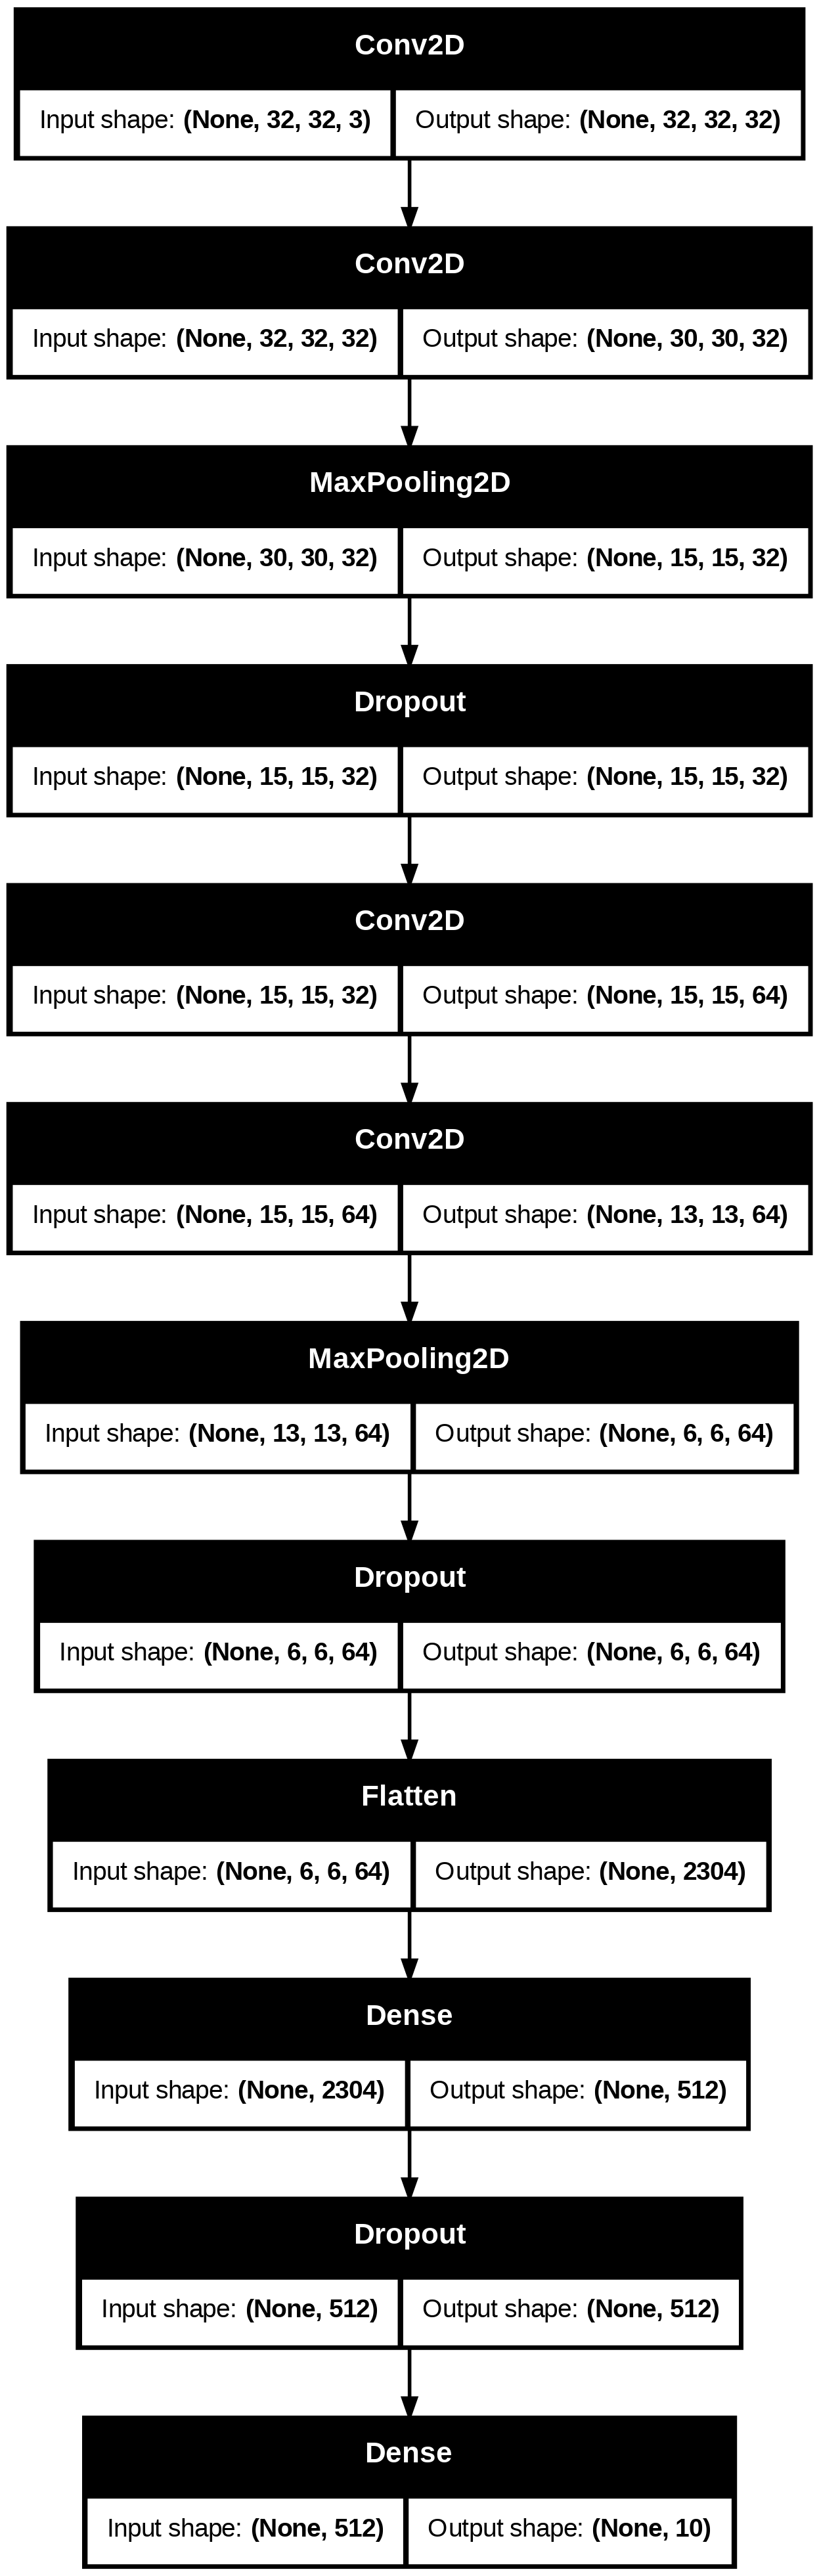

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

The model has two convolutional layers with 32 filters connected to inputs. After that we have pooling layer and dropout layer which deactivates 25% of neurons. After that we have the same structure, just with 64 filters in the convolutional layers. They are followed by dense layer with 512 neurons, dropout layer deactivating 50% of neurons. And finally the output is given.

For convolutional and dense layers ReLu activation was used, while for output layer Softmax function was chosen.

Adam optimizer with a learning rate of 0.001 was used.

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model_eval = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3357 - loss: 1.7799 - val_accuracy: 0.5893 - val_loss: 1.1742
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5663 - loss: 1.2163 - val_accuracy: 0.6405 - val_loss: 1.0257
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6349 - loss: 1.0438 - val_accuracy: 0.6848 - val_loss: 0.9028
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6731 - loss: 0.9257 - val_accuracy: 0.7187 - val_loss: 0.8010
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7046 - loss: 0.8382 - val_accuracy: 0.7438 - val_loss: 0.7402
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7280 - loss: 0.7803 - val_accuracy: 0.7423 - val_loss: 0.7412
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7457 - loss: 0.7208 - val_accuracy: 0.7529 - val_loss: 0.7266
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7544 - loss: 0.7054

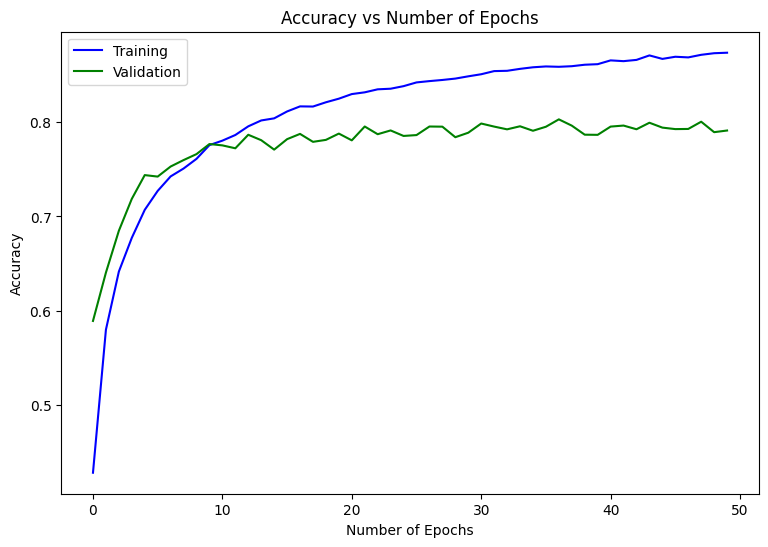

In [13]:
# Accuracy vs number of epochs
plt.figure(figsize=(9, 6))
plt.plot(model_eval.history['accuracy'], label='Training', color='blue')
plt.plot(model_eval.history['val_accuracy'], label='Validation', color='green')
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.title("Accuracy vs Number of Epochs")
plt.legend()

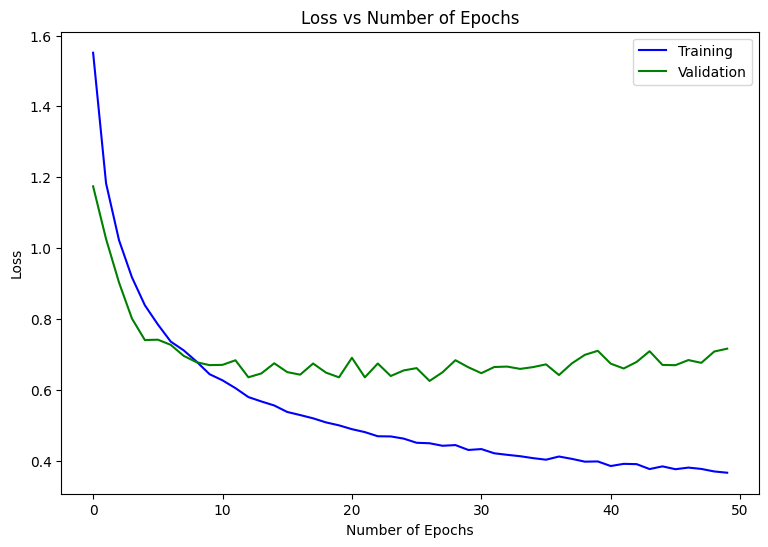

In [14]:
# Loss vs Number of Epochs
plt.figure(figsize=(9, 6))
plt.plot(model_eval.history['loss'], label='Training', color='blue')
plt.plot(model_eval.history['val_loss'], label='Validation', color='green')
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.title("Loss vs Number of Epochs")
plt.legend()

From the graphs above we see that the model performance does not improve on validation set when training it for more than 13 epochs, it even starts to decrease, thus showing signs of overfitting. Thus, final model is trained for 13 epochs.

In [16]:
final_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=13)

Epoch 1/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8739 - loss: 0.3682 - val_accuracy: 0.7806 - val_loss: 0.7567
Epoch 2/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8728 - loss: 0.3671 - val_accuracy: 0.7954 - val_loss: 0.6901
Epoch 3/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8787 - loss: 0.3560 - val_accuracy: 0.8008 - val_loss: 0.7044
Epoch 4/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8786 - loss: 0.3546 - val_accuracy: 0.7971 - val_loss: 0.6678
Epoch 5/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8795 - loss: 0.3529 - val_accuracy: 0.7994 - val_loss: 0.6798
Epoch 6/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8825 - loss: 0.3436 - val_accuracy: 0.7937 - val_loss: 0.6969
Epoch 7/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8827 - loss: 0.3417 - val_accuracy: 0.7969 - val_loss: 0.6841
Epoch 8/13
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8825 - loss: 0.3429

In [17]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

# Confusion matrix for validation set
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
confusion_mtx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    3,   60,   28,   29,   16,   15,   17,   51,   34],
       [  11, 1034,    2,    8,    0,    6,   20,    4,   15,   73],
       [  48,    0,  866,   45,   76,   51,   88,   25,    4,    3],
       [  13,    2,   63,  676,   75,  193,  103,   39,   11,    8],
       [  17,    2,   58,   55,  945,   28,   63,   56,    4,    2],
       [   4,    0,   45,  138,   52,  878,   37,   38,    3,    2],
       [   2,    2,   34,   25,   21,   21, 1075,    3,    4,    4],
       [   4,    1,   24,   41,   61,   48,   12, 1076,    3,    3],
       [  50,   12,   16,   17,    3,    9,    8,    3, 1053,   21],
       [  10,   38,    1,   12,    8,    7,   12,   15,   18, 1028]],
      dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix for Validation Set')

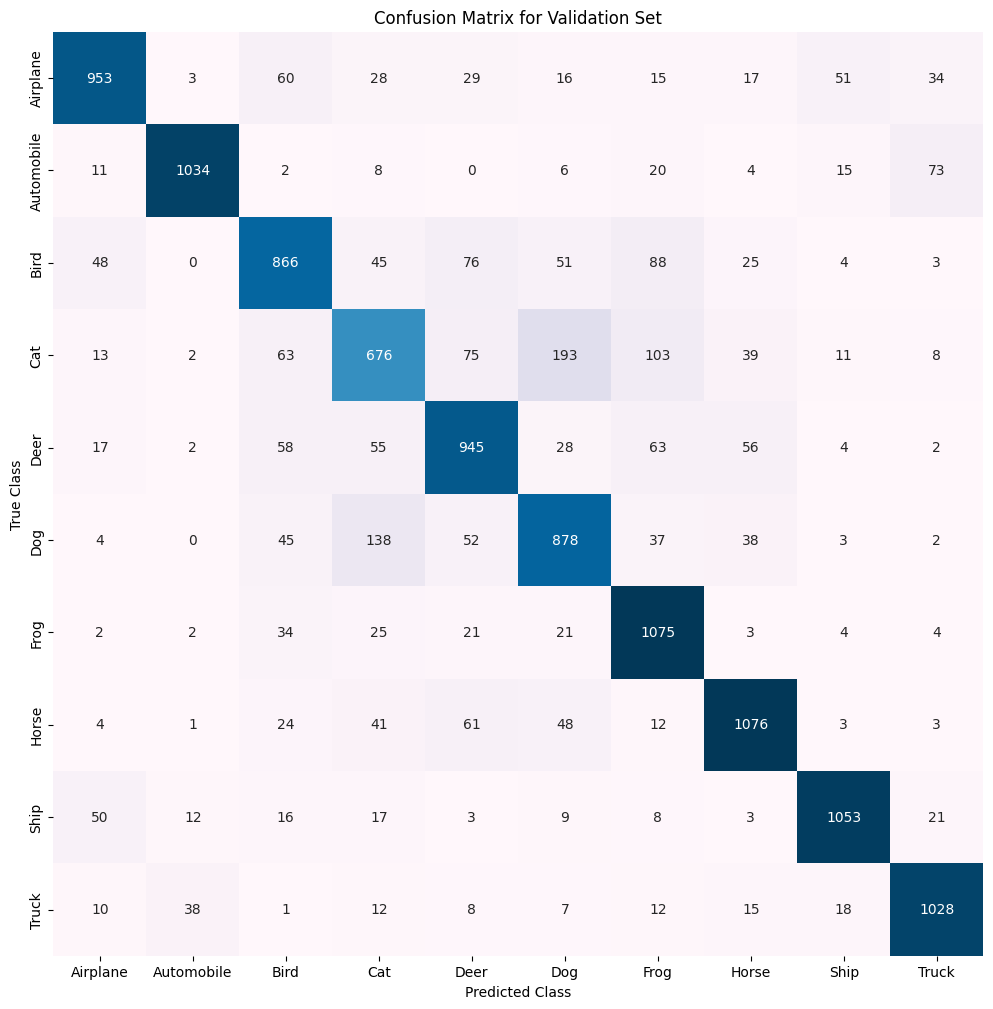

In [19]:
# Plotting the confusion matrix to be easier to understand

classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog',
           'Horse', 'Ship', 'Truck']
plt.figure(figsize=(12, 12))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='PuBu', cbar=False)
c.set(xticklabels=classes, yticklabels=classes)
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.title("Confusion Matrix for Validation Set")

CNN worked quite well at classifying images. Achieved total accuracy was 88.6% for training set and 79.9% for validation set.

Looking at the confusion matrix for the validation set we can note that the most common mistake was confusing mixing up cats and dogs. Also quite a lot of cats were labeled as frogs by the model.

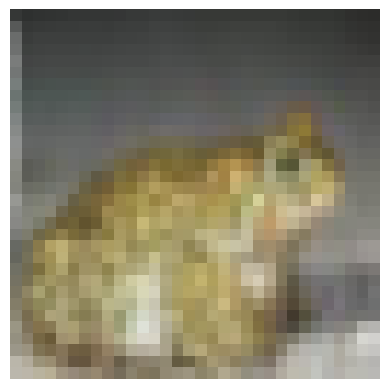

True class: Frog. Predicted class: Frog


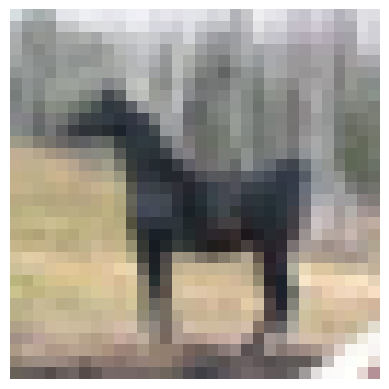

True class: Horse. Predicted class: Horse


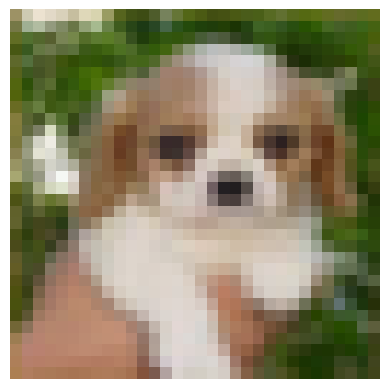

True class: Dog. Predicted class: Dog


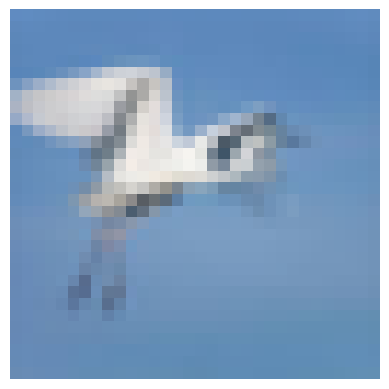

True class: Bird. Predicted class: Airplane


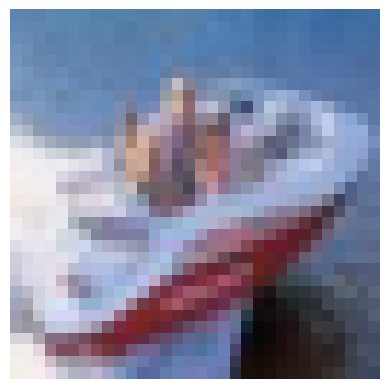

True class: Ship. Predicted class: Ship


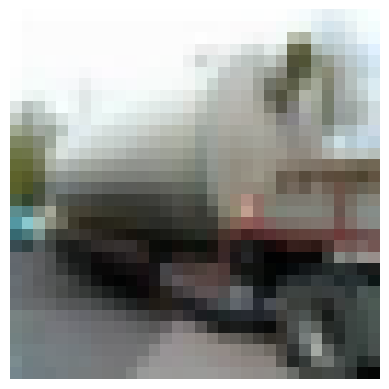

True class: Truck. Predicted class: Truck


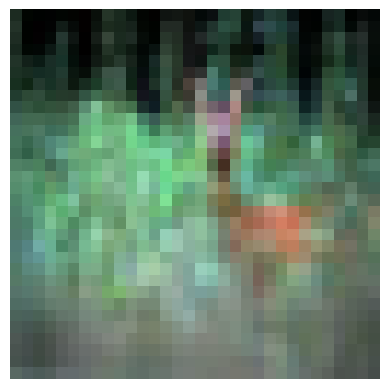

True class: Deer. Predicted class: Deer


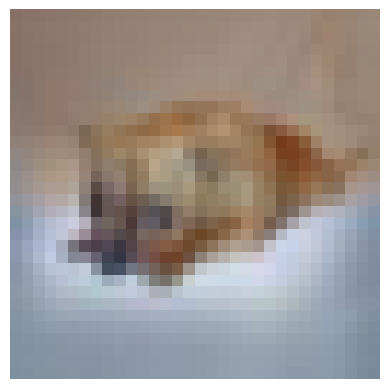

True class: Dog. Predicted class: Frog


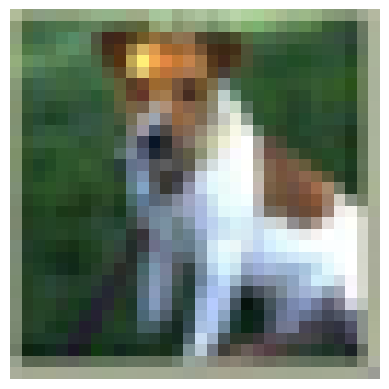

True class: Dog. Predicted class: Dog


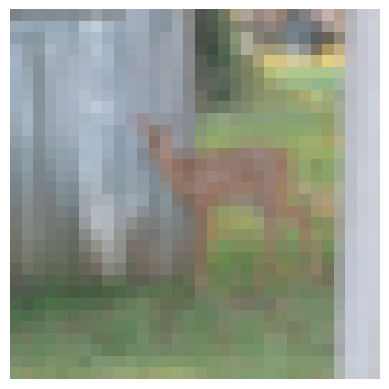

True class: Deer. Predicted class: Deer


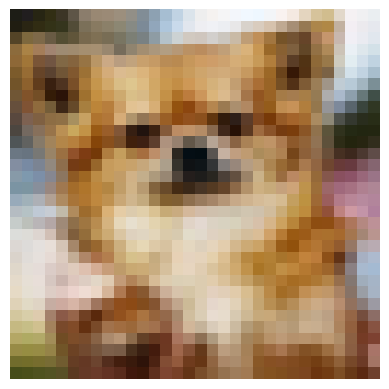

True class: Dog. Predicted class: Dog


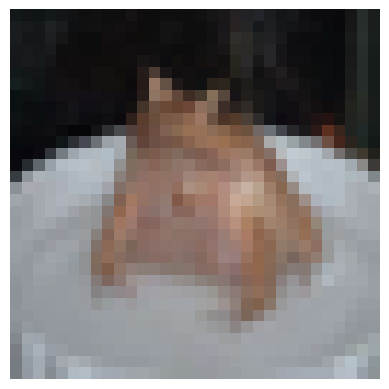

True class: Frog. Predicted class: Cat


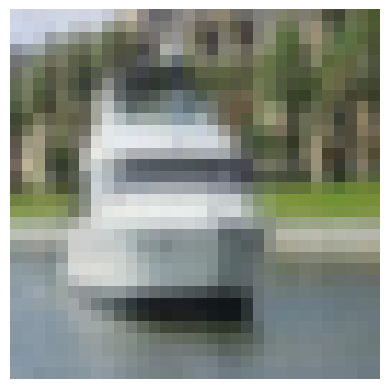

True class: Ship. Predicted class: Ship


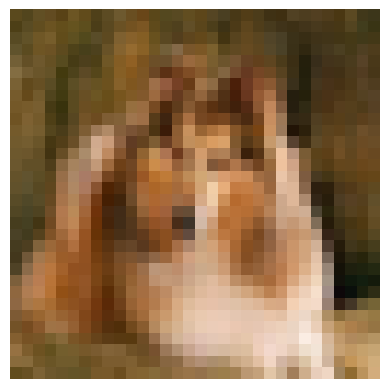

True class: Dog. Predicted class: Dog


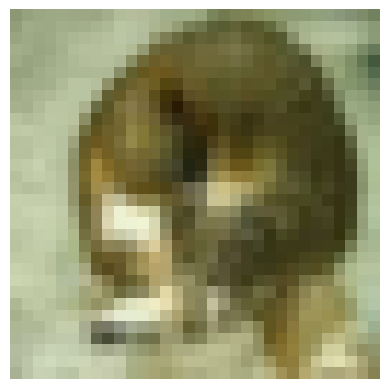

True class: Cat. Predicted class: Frog


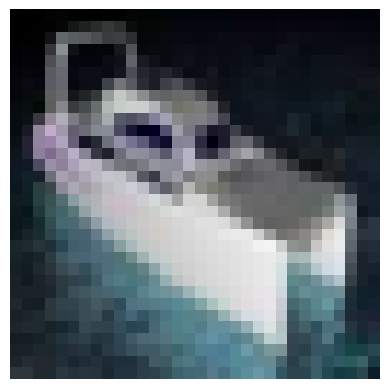

True class: Ship. Predicted class: Ship


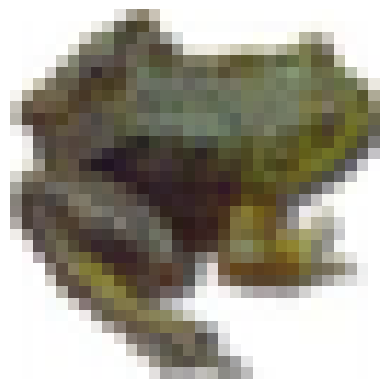

True class: Frog. Predicted class: Frog


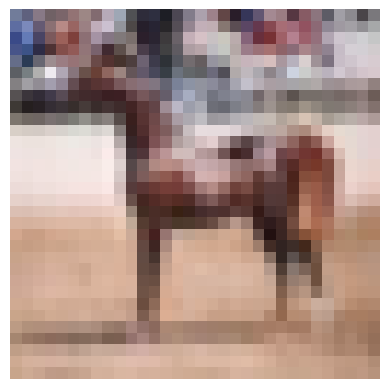

True class: Horse. Predicted class: Horse


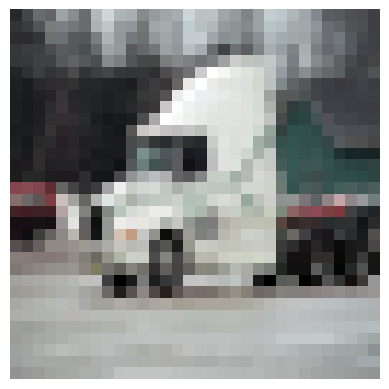

True class: Truck. Predicted class: Truck


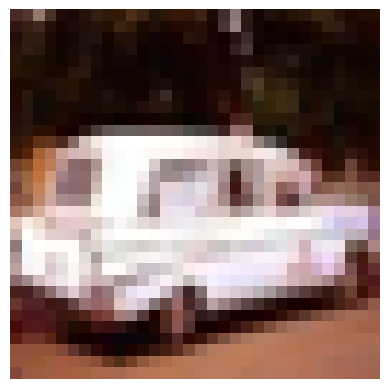

True class: Automobile. Predicted class: Automobile


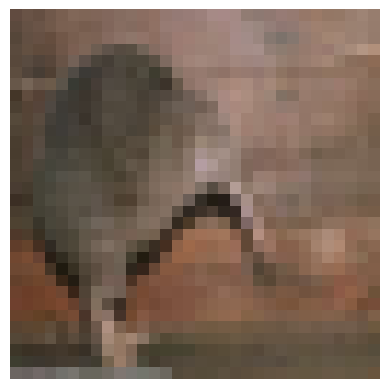

True class: Bird. Predicted class: Bird


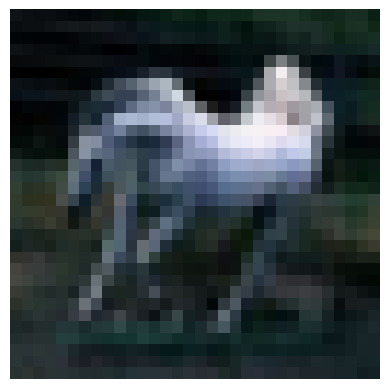

True class: Horse. Predicted class: Dog


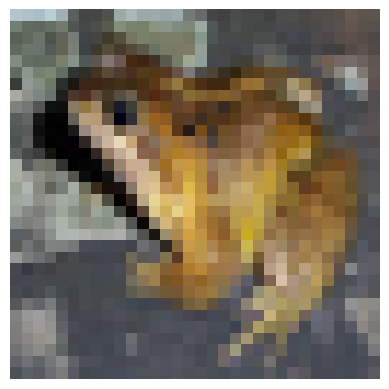

True class: Frog. Predicted class: Frog


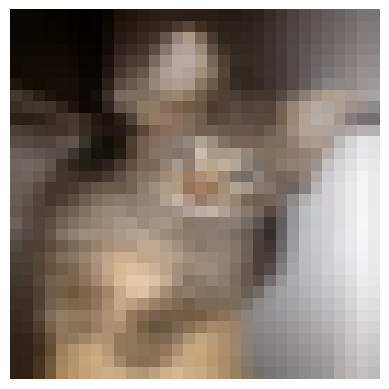

True class: Cat. Predicted class: Cat


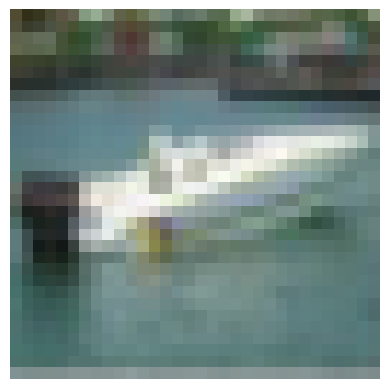

True class: Ship. Predicted class: Ship


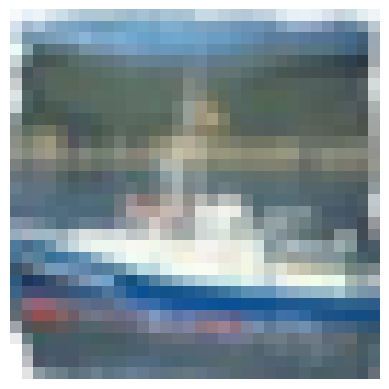

True class: Ship. Predicted class: Ship


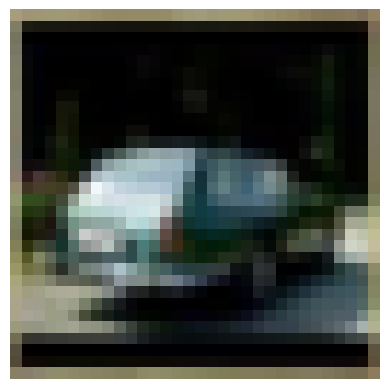

True class: Automobile. Predicted class: Automobile


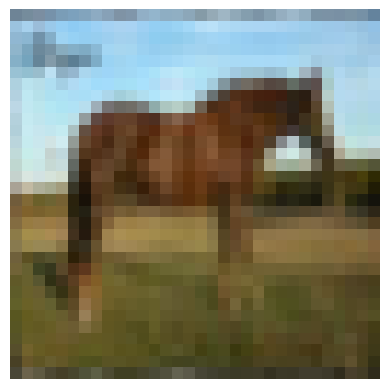

True class: Horse. Predicted class: Horse


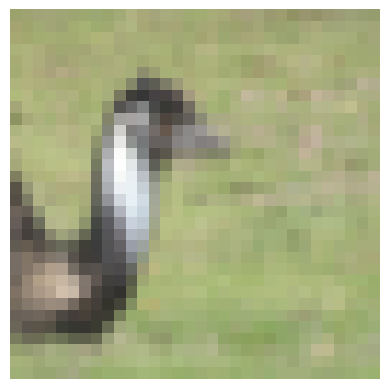

True class: Bird. Predicted class: Bird


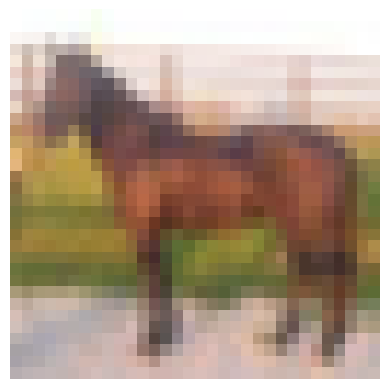

True class: Horse. Predicted class: Horse


In [20]:
# Randomly chosen pictures from the validation set with their true class and predicted label
numbers = random.sample(range(0, 10000), 30)
for i in numbers:
  plt.figure()
  image_number = i

  plt.imshow(x_test[image_number])
  plt.axis("off")
  plt.show()

  predicted_label = classes[y_pred_classes[i]]
  original_label = classes[y_true[i]]
  print("True class: {}. Predicted class: {}".format(
    original_label, predicted_label))

## Conclusions

- CNN model was built for classifying pictures of 10 categories.
- After 13 epochs the performance of the model started to remain almost the same on validation dataset
- The model achieved good accuracy correctly classifying almost 89% of training data and almost 80% of validation data.
- The most common mistakes made by the model on validation data were confusing cats and dogs and labeling cat as frog.